In [75]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
from scipy.ndimage import binary_erosion, generic_filter
from scipy.ndimage import uniform_filter
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator, FixedLocator

In [7]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

In [8]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

In [9]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    """
    Calculate the optimal rotation angles for each grid point to align DDM winds with NWP winds.
    
    Parameters:
    u_DDM (ndarray): U-component of wind from DDM
    v_DDM (ndarray): V-component of wind from DDM
    u_NWP (ndarray): U-component of wind from NWP
    v_NWP (ndarray): V-component of wind from NWP
    
    Returns:
    ndarray: Matrix of rotation angles (in radians) for each grid point
    """
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

def prepare_datasets_NWP(data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl

def prepare_datasets_DDM(angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values

    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles)            #-np.pi/13.75831)

    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values

    #angle_rotation = -np.pi/13.75831 to correct projection of wind components
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)                 #-np.pi/13.75831)

    return latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl


def compute_Rossby_number(latitude, u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl):
    
    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    u_PRED, v_PRED = u_pred_selected_pl, v_pred_selected_pl
    u_GT, v_GT = u_gt_selected_pl, v_gt_selected_pl
    
    du_dy_PRED, du_dx_PRED = np.gradient(u_PRED, 2500, 2500)
    dv_dy_PRED, dv_dx_PRED = np.gradient(v_PRED, 2500, 2500)
    
    du_dy_GT, du_dx_GT = np.gradient(u_GT, 2500, 2500)
    dv_dy_GT, dv_dx_GT = np.gradient(v_GT, 2500, 2500)

    # Initialize Ro_PRED and Ro_GT with default value 1000
    Ro_PRED = np.full_like(u_PRED, 1000)  # Fill with 1000 initially
    Ro_GT = np.full_like(u_GT, 1000)      # Fill with 1000 initially

    numerator_PRED = np.sqrt((u_PRED * du_dx_PRED + 
                             v_PRED * du_dy_PRED)** 2 + 
                             (u_PRED * dv_dx_PRED + 
                             v_PRED * dv_dy_PRED) ** 2)
    
    denominator_PRED = f * np.sqrt(v_PRED** 2 + u_PRED** 2)
    Ro_PRED = numerator_PRED / denominator_PRED

    numerator_GT = np.sqrt((u_GT * du_dx_GT + 
                            v_GT * du_dy_GT)**2 + 
                            (u_GT * dv_dx_GT + 
                            v_GT * dv_dy_GT) ** 2)

    denominator_GT = f  * np.sqrt(v_GT**2 + u_GT** 2)
    Ro_GT = numerator_GT / denominator_GT
    ###########################################################################################

    return Ro_PRED, Ro_GT
    

def get_geo_deviation(Ro_threshold, latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl):

    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    # Compute the Phi gradient (Phi = Geopotential height): 
    # You take the difference between two adjacent grid points and divide by the distance in meters --> np.gradient(F, dx, dy)
    dPhi_dy_p, dPhi_dx_p = np.gradient(Phi_pred_selected_pl, 2500, 2500)
    dPhi_dy_gt, dPhi_dx_gt = np.gradient(Phi_gt_selected_pl, 2500, 2500)

    # Observed Velocities 
    u_pred = u_pred_selected_pl
    v_pred = v_pred_selected_pl
    u_gt = u_gt_selected_pl
    v_gt = v_gt_selected_pl
    
    # Computed Geostrophic Velocities 
    ug_pred = -(1/f) * dPhi_dy_p
    vg_pred = (1/f) * dPhi_dx_p
    ug_gt = -(1/f) * dPhi_dy_gt
    vg_gt = (1/f) * dPhi_dx_gt
    
    #NORMALIZED GEO DEV
    norm_GEO_DEV_PRED = np.sqrt((u_pred - ug_pred)**2 + (v_pred - vg_pred)**2) / np.mean(np.sqrt(u_pred**2 + v_pred**2))
    norm_GEO_DEV_GT = np.sqrt((u_gt - ug_gt)**2 + (v_gt - vg_gt)**2) / np.mean(np.sqrt(u_gt**2 + v_gt**2)) 
    
    #ABSOLUTE GEO DEV
    abs_GEO_DEV_PRED = np.sqrt((u_pred - ug_pred)**2 + (v_pred - vg_pred)**2)
    abs_GEO_DEV_GT = np.sqrt((u_gt - ug_gt)**2 + (v_gt - vg_gt)**2) 
    
    # Compute the magnitude of the geopotential gradient
    Phi_grad_pred = np.sqrt(dPhi_dx_p**2 + dPhi_dy_p**2)
    Phi_grad_gt = np.sqrt(dPhi_dx_gt**2 + dPhi_dy_gt**2)
    
    # Compute the magnitude of the speed
    speed_pred = np.sqrt(u_pred**2 + v_pred**2)
    speed_gt = np.sqrt(u_gt**2 + v_gt**2)

    return norm_GEO_DEV_PRED, norm_GEO_DEV_GT, abs_GEO_DEV_PRED, abs_GEO_DEV_GT, Phi_grad_pred, Phi_grad_gt, speed_pred, speed_gt



def compute_Coriolis_marix(latitude, u_pred_selected_pl):
    Omega = 7.2921e-5  
    latitudes_2d = np.tile(latitude[:,0], (u_pred_selected_pl.shape[1], 1)).T  
    f = 2 * Omega * np.sin(np.radians(latitudes_2d))
    return f


def compute_statistics(PRED,GT):
    predictions = PRED.flatten()
    ground_truth = GT.flatten()
    predictions = predictions[~np.isnan(predictions) & ~np.isinf(predictions)]
    ground_truth = ground_truth[~np.isnan(ground_truth) & ~np.isinf(ground_truth)]
    
    mean_pred = np.mean(predictions)
    mean_gt = np.mean(ground_truth)
    
    median_pred = np.median(predictions)
    median_gt = np.median(ground_truth)
    
    std_pred = np.std(predictions)
    std_gt = np.std(ground_truth)
    
    count_pred = np.count_nonzero(~np.isnan(PRED))
    count_gt = np.count_nonzero(~np.isnan(GT))
    
    return mean_pred, mean_gt, median_pred, median_gt, std_pred, std_gt, count_pred, count_gt

def get_statistics(Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM):

    # Call 'prepare_datasets()'
    latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
    latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)
    
    # Call 'get_geo_balance_where_Ro_under_threshold()' 
    norm_DEV_PRED_NWP, norm_DEV_GT_NWP, abs_DEV_PRED_NWP, abs_DEV_GT_NWP, Phi_grad_pred_NWP, Phi_grad_gt_NWP, speed_pred_NWP, speed_gt_NWP = get_geo_deviation(Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    norm_DEV_PRED_DDM, norm_DEV_GT_DDM, abs_DEV_PRED_DDM, abs_DEV_GT_DDM, Phi_grad_pred_DDM, Phi_grad_gt_DDM, speed_pred_DDM, speed_gt_DDM = get_geo_deviation(Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)

    # Call 'compute_Rossby_number(u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl)'
    Ro_PRED_NWP, Ro_GT_NWP = compute_Rossby_number(latitude_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    Ro_PRED_DDM, Ro_GT_DDM = compute_Rossby_number(latitude_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)
    
    norm_DEV_PRED_1_NWP = np.where(Ro_PRED_NWP <= Ro_threshold, norm_DEV_PRED_NWP, np.nan)
    norm_DEV_GT_1_NWP = np.where(Ro_GT_NWP <= Ro_threshold, norm_DEV_GT_NWP, np.nan)

    norm_DEV_PRED_1_DDM = np.where(Ro_PRED_DDM <= Ro_threshold, norm_DEV_PRED_DDM, np.nan)
    norm_DEV_GT_1_DDM = np.where(Ro_GT_DDM <= Ro_threshold, norm_DEV_GT_DDM, np.nan)

    norm_DEV_PRED_2_NWP = norm_DEV_PRED_1_NWP 
    norm_DEV_GT_2_NWP = norm_DEV_GT_1_NWP 

    norm_DEV_PRED_2_DDM = norm_DEV_PRED_1_DDM
    norm_DEV_GT_2_DDM = norm_DEV_GT_1_DDM
    
    #compute statistics
    mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM = compute_statistics(norm_DEV_PRED_2_DDM, norm_DEV_GT_2_DDM)
    mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP = compute_statistics(norm_DEV_PRED_2_NWP, norm_DEV_GT_2_NWP)
    
    return mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM, mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP


def get_datasets_abs_deviations(Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM):

    latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
    latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

    norm_DEV_PRED_NWP, norm_DEV_GT_NWP, abs_DEV_PRED_NWP, abs_DEV_GT_NWP, speed_pred_NWP, speed_gt_NWP, Phi_grad_pred_NWP, Phi_grad_gt_NWP = get_geo_deviation(Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    norm_DEV_PRED_DDM, norm_DEV_GT_DDM, abs_DEV_PRED_DDM, abs_DEV_GT_DDM, speed_pred_DDM, speed_gt_DDM, Phi_grad_pred_DDM, Phi_grad_gt_DDM = get_geo_deviation(Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)


    # Call 'compute_Rossby_number(u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl)'
    Ro_PRED_NWP, Ro_GT_NWP = compute_Rossby_number(latitude_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    Ro_PRED_DDM, Ro_GT_DDM = compute_Rossby_number(latitude_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)
    
    abs_DEV_PRED_1_NWP = np.where(Ro_PRED_NWP <= Ro_threshold, abs_DEV_PRED_NWP, np.nan)
    abs_DEV_GT_1_NWP = np.where(Ro_GT_NWP <= Ro_threshold, abs_DEV_GT_NWP, np.nan)

    abs_DEV_PRED_1_DDM = np.where(Ro_PRED_DDM <= Ro_threshold, abs_DEV_PRED_DDM, np.nan)
    abs_DEV_GT_1_DDM = np.where(Ro_GT_DDM <= Ro_threshold, abs_DEV_GT_DDM, np.nan)
 
    abs_DEV_PRED_2_NWP = abs_DEV_PRED_1_NWP
    abs_DEV_GT_2_NWP = abs_DEV_GT_1_NWP

    abs_DEV_PRED_2_DDM = abs_DEV_PRED_1_DDM
    abs_DEV_GT_2_DDM = abs_DEV_GT_1_DDM

    
    return abs_DEV_PRED_1_NWP, abs_DEV_GT_1_NWP, abs_DEV_PRED_1_DDM, abs_DEV_GT_1_DDM, abs_DEV_PRED_2_NWP, abs_DEV_GT_2_NWP, abs_DEV_PRED_2_DDM, abs_DEV_GT_2_DDM

def block_average(data, factor_smoothing):
    kernel_size = 2 * factor_smoothing + 1
    smoothed_data = uniform_filter(data, size=kernel_size, mode='nearest')
    return smoothed_data


def prepare_datasets_NWP_smoothing(factor_smoothing, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    latitude_smoothed = block_average(latitude, factor_smoothing)
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    longitude_smoothed = block_average(longitude, factor_smoothing)

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values 
    Phi_pred_selected_pl_smoothed = block_average(Phi_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    u_pred_selected_pl_smoothed = block_average(u_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    v_pred_selected_pl_smoothed = block_average(v_pred_selected_pl, factor_smoothing)
    
    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values 
    Phi_gt_selected_pl_smoothed = block_average(Phi_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    u_gt_selected_pl_smoothed = block_average(u_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    v_gt_selected_pl_smoothed = block_average(v_gt_selected_pl, factor_smoothing)

    return latitude_smoothed, longitude_smoothed, Phi_pred_selected_pl_smoothed, u_pred_selected_pl_smoothed, v_pred_selected_pl_smoothed, Phi_gt_selected_pl_smoothed, u_gt_selected_pl_smoothed, v_gt_selected_pl_smoothed
    
def prepare_datasets_DDM_smoothing(factor_smoothing, angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    latitude_smoothed = block_average(latitude, factor_smoothing)
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    longitude_smoothed = block_average(longitude, factor_smoothing)

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values 
    Phi_pred_selected_pl_smoothed = block_average(Phi_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    
    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles) 
    u_pred_selected_pl_smoothed = block_average(u_pred_selected_pl, factor_smoothing)
    v_pred_selected_pl_smoothed = block_average(v_pred_selected_pl, factor_smoothing)
    
    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    Phi_gt_selected_pl_smoothed = block_average(Phi_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)    
    u_gt_selected_pl_smoothed = block_average(u_gt_selected_pl, factor_smoothing)
    v_gt_selected_pl_smoothed = block_average(v_gt_selected_pl, factor_smoothing)

    return latitude_smoothed, longitude_smoothed, Phi_pred_selected_pl_smoothed, u_pred_selected_pl_smoothed, v_pred_selected_pl_smoothed, Phi_gt_selected_pl_smoothed, u_gt_selected_pl_smoothed, v_gt_selected_pl_smoothed

In [10]:
u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, 7:450, 7:450]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, 8:451, 8:451]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, 7:450, 7:450]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, 8:451, 8:451]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

In [11]:
def get_geostrophic_wind(Ro_threshold, latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl):

    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    # Compute the Phi gradient (Phi = Geopotential height): 
    # You take the difference between two adjacent grid points and divide by the distance in meters --> np.gradient(F, dx, dy)
    dPhi_dy_p, dPhi_dx_p = np.gradient(Phi_pred_selected_pl, 2500, 2500)
    dPhi_dy_gt, dPhi_dx_gt = np.gradient(Phi_gt_selected_pl, 2500, 2500)

    # Observed Velocities 
    u_pred = u_pred_selected_pl
    v_pred = v_pred_selected_pl
    u_gt = u_gt_selected_pl
    v_gt = v_gt_selected_pl

    speed_pred = np.sqrt(u_pred**2 + v_pred**2)
    speed_gt = np.sqrt(u_gt**2 + v_gt**2)
    
    # Computed Geostrophic Velocities 
    ug_pred = -(1/f) * dPhi_dy_p
    vg_pred = (1/f) * dPhi_dx_p
    ug_gt = -(1/f) * dPhi_dy_gt
    vg_gt = (1/f) * dPhi_dx_gt
    
    # Compute the magnitude of the speed
    geo_speed_pred = np.sqrt(ug_pred**2 + vg_pred**2)
    geo_speed_gt = np.sqrt(ug_gt**2 + vg_gt**2)

    Ro_PRED, Ro_GT = compute_Rossby_number(latitude, u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl)
    
    speed_pred = np.where(Ro_PRED <= Ro_threshold, speed_pred, np.nan)
    speed_gt = np.where(Ro_GT <= Ro_threshold, speed_gt, np.nan)

    geo_speed_pred = np.where(Ro_PRED <= Ro_threshold, geo_speed_pred, np.nan)
    geo_speed_gt = np.where(Ro_GT <= Ro_threshold, geo_speed_gt, np.nan)

    return speed_pred, speed_gt, geo_speed_pred, geo_speed_gt

In [160]:
def scatter_plot(speed_pred_NWP, speed_pred_DDM, speed_gt_DDM,
                 geo_speed_pred_NWP, geo_speed_pred_DDM, geo_speed_gt_DDM,
                 xlabel, ylabel, xlim, ylim, show_titles,
                 show_xticks, save_path, tick_label_size=14, xtickslabels=None, 
                 show_unit_measure_y=True, show_unit_measure_x=True):

    speed_pred_NWP_flat = speed_pred_NWP.flatten()
    speed_pred_DDM_flat = speed_pred_DDM.flatten()
    speed_gt_DDM_flat = speed_gt_DDM.flatten()

    geo_speed_pred_NWP_flat = geo_speed_pred_NWP.flatten()
    geo_speed_pred_DDM_flat = geo_speed_pred_DDM.flatten()
    geo_speed_gt_DDM_flat = geo_speed_gt_DDM.flatten()

    fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    datasets = [
        (speed_pred_NWP_flat, geo_speed_pred_NWP_flat, "NWP (lt=6h)", "blue"),
        (speed_pred_DDM_flat, geo_speed_pred_DDM_flat, "DDM (lt=6h)", "green"),
        (speed_gt_DDM_flat, geo_speed_gt_DDM_flat, "Analysis", "orange")
    ]

    for i, (ax, (x, y, title, color)) in enumerate(zip(axes, datasets)):

        ax.scatter(x, y, alpha=0.5, s=10, color=color)
        ax.plot([0, 37], [0, 37], 'k--', alpha=0.8, linewidth=1)

        if show_titles:
            ax.set_title(title, fontsize=18)

        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)

        # -------------------------
        # CUSTOM X-TICKS IF SET
        # -------------------------
        if xtickslabels is not None:
            ax.set_xticks(xtickslabels)
            ax.set_xticklabels([str(v) for v in xtickslabels], fontsize=tick_label_size)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(nbins=7, prune='upper'))

        # Y-axis ticks
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

        # LEFT PANEL → original ylabel
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=18)

        # MIDDLE PANEL → no y labels
        if i == 1:
            ax.set_yticklabels([])

        # RIGHT PANEL → ticks/labels on right
        if i == 2:
            ax.yaxis.set_ticks_position('right')
            ax.yaxis.set_label_position('right')
            #ax.set_ylabel(r'$\mathrm{m\,s^{-1}}$', fontsize=18)

        # Hide x tick labels if requested
        if not show_xticks:
            ax.set_xticklabels([])

        # Tick sizes
        ax.tick_params(axis='x', labelsize=tick_label_size)
        ax.tick_params(axis='y', labelsize=tick_label_size)

        ax.grid(True, which='both', linestyle='--', alpha=0.4)
        
        if show_unit_measure_y:
            fig.text(1.0, 0.55, r'$(\mathrm{m\,s^{-1}})$', va='center',
                     rotation='vertical', fontsize=17, color='black', color=(0, 0, 0, 0.6))
        else:
            fig.text(1.0, 0.55, r'$(\mathrm{m\,s^{-1}})$', va='center',
                     rotation='vertical', fontsize=17, color='white', color=(0, 0, 0, 0.6))

        if show_unit_measure_x:
            fig.text(0.5, -0.25, f"{xlabel}" + "\n\n" + r"$(\mathrm{{m\,s^{{-1}}}})$", ha='center', fontsize=17, color=(0, 0, 0, 0.6))
        else:
            fig.text(0.5, -0.05, xlabel, ha='center', fontsize=17, color=(0, 0, 0, 0.6))

        plt.subplots_adjust(right=0.92, bottom=0.18)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

SyntaxError: keyword argument repeated: color (4038126802.py, line 72)

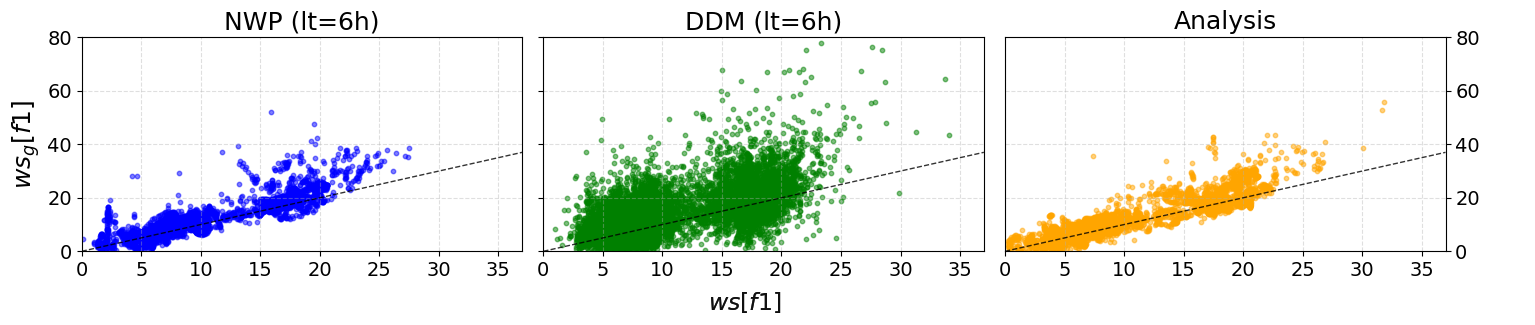

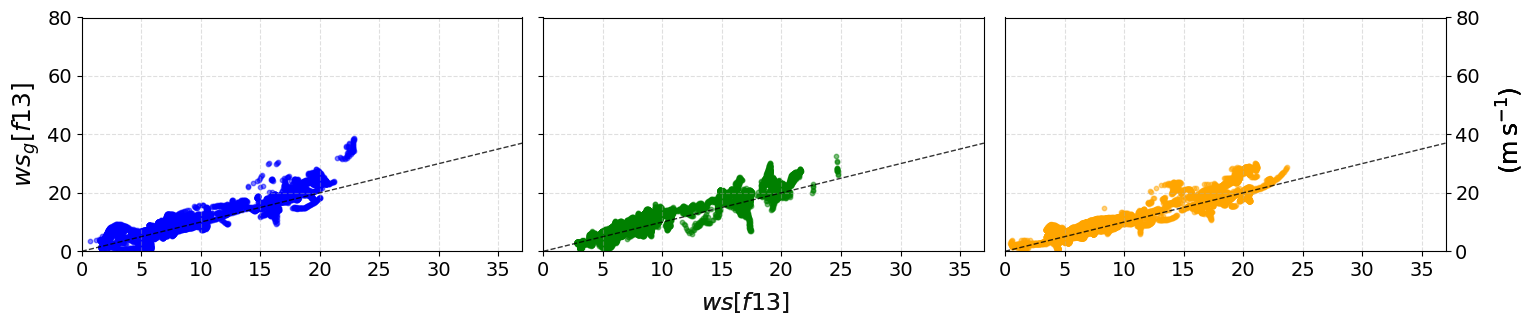

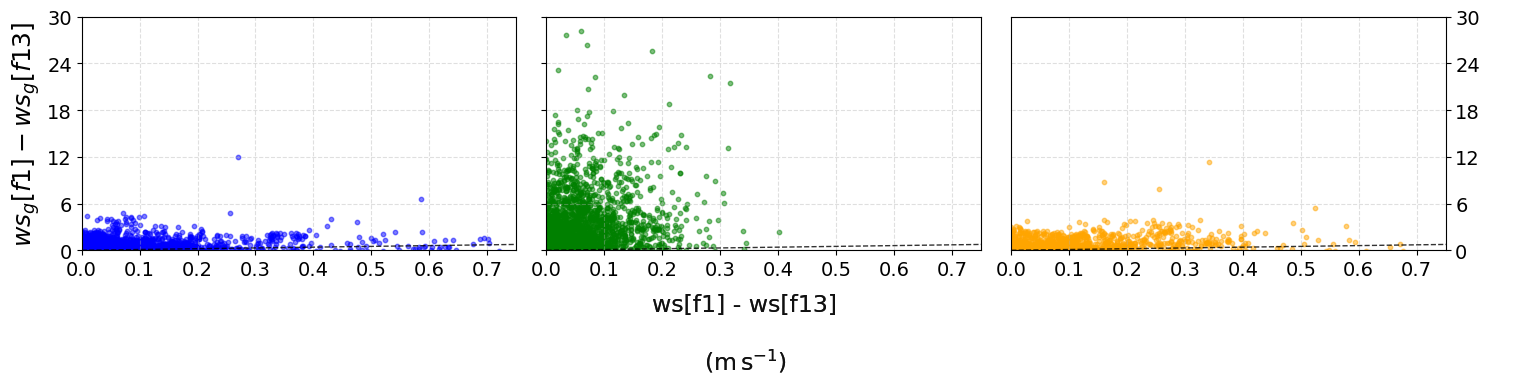

In [161]:
'''
NO SMOOTHING 06UTC
'''

pl_selected = 500
Ro_threshold = 0.1

lat_DDM, lon_DDM = [7,450], [7,450]
lat_NWP, lon_NWP = [8,451], [8,451]

#(NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC')
#(DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC')

data_pred_NWP, data_gt_NWP, lead_time_NWP = NWP_pred_00_0507, NWP_gt_06_0507, 6
data_pred_DDM, data_gt_DDM, lead_time_DDM = DDM_pred_00_0507, DDM_gt_06_0507, 1

latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

speed_pred_NWP_f1, speed_gt_NWP_f1, geo_speed_pred_NWP_f1, geo_speed_gt_NWP_f1 = get_geostrophic_wind(Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
speed_pred_DDM_f1, speed_gt_DDM_f1, geo_speed_pred_DDM_f1, geo_speed_gt_DDM_f1 = get_geostrophic_wind(Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)

save_path = ""
scatter_plot(speed_pred_NWP_f1, speed_pred_DDM_f1, speed_gt_DDM_f1, geo_speed_pred_NWP_f1, geo_speed_pred_DDM_f1, geo_speed_gt_DDM_f1, r'$ws[f1]$', r'$ws_g[f1]$', 37, 80, show_titles = True, show_xticks = True, save_path = save_path, xtickslabels = [0, 5, 10, 15, 20, 25, 30, 35], show_unit_measure_y=False, show_unit_measure_x=False)   #~(\mathrm{m\,s^{-1}})

'''
WITH SMOOTHING 06UTC
'''

factor_smoothing = 6
pl_selected = 500 
Ro_threshold = 0.1

lat_DDM, lon_DDM = [7,450], [7,450]
lat_NWP, lon_NWP = [8,451], [8,451]

#(NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC')
#(DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC')

data_pred_NWP, data_gt_NWP, lead_time_NWP = NWP_pred_00_0507, NWP_gt_06_0507, 6
data_pred_DDM, data_gt_DDM, lead_time_DDM = DDM_pred_00_0507, DDM_gt_06_0507, 1

latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP_smoothing(factor_smoothing, data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM_smoothing(factor_smoothing, angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

speed_pred_NWP_f13, speed_gt_NWP_f13, geo_speed_pred_NWP_f13, geo_speed_gt_NWP_f13 = get_geostrophic_wind(Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
speed_pred_DDM_f13, speed_gt_DDM_f13, geo_speed_pred_DDM_f13, geo_speed_gt_DDM_f13 = get_geostrophic_wind(Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)

save_path = ""
scatter_plot(speed_pred_NWP_f13, speed_pred_DDM_f13, speed_gt_DDM_f13, geo_speed_pred_NWP_f13, geo_speed_pred_DDM_f13, geo_speed_gt_DDM_f13, r'$ws[f13]$', r'$ws_g[f13]$', 37, 80, show_titles = False, show_xticks = True, save_path = save_path, xtickslabels = [0, 5, 10, 15, 20, 25, 30, 35], show_unit_measure_y=True, show_unit_measure_x=False)    #~(\mathrm{m\,s^{-1}})


'''
NOISE SCATTER PLOT
'''

noise_speed_pred_NWP = speed_pred_NWP_f1 - speed_pred_NWP_f13
noise_speed_pred_DDM = speed_pred_DDM_f1 - speed_pred_DDM_f13
noise_speed_gt_DDM = speed_gt_DDM_f1 - speed_gt_DDM_f13
noise_geo_speed_pred_NWP = geo_speed_pred_NWP_f1 - geo_speed_pred_NWP_f13
noise_geo_speed_pred_DDM = geo_speed_pred_DDM_f1 - geo_speed_pred_DDM_f13
noise_geo_speed_gt_DDM = geo_speed_gt_DDM_f1 - geo_speed_gt_DDM_f13

save_path = ""
scatter_plot(noise_speed_pred_NWP, noise_speed_pred_DDM, noise_speed_gt_DDM, noise_geo_speed_pred_NWP, noise_geo_speed_pred_DDM, noise_geo_speed_gt_DDM, r'ws[f1] - ws[f13]', r'$ws_g[f1] - ws_g[f13]$', 0.75, 30, show_titles = False, show_xticks = True, save_path = save_path, xtickslabels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], show_unit_measure_y=False, show_unit_measure_x=True)    #~(\mathrm{m\,s^{-1}})$
